In [108]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

import pickle
import warnings
from pathlib import Path
import matplotlib.ticker as mtick

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

import joblib

In [2]:
warnings.filterwarnings('ignore')

In [3]:
file_path = Path('../Data/data.csv')

In [5]:
df = pd.read_csv(file_path, sep=',')
df.head(3)

,price,price_category,type,beds,baths,address,furnishing,completion_status,post_date,average_rent,...,total_parking_spaces,total_floors,total_building_area_sqft,elevators,area_name,city,country,Latitude,Longitude,purpose
0,1450000,Medium,Apartment,1,2,"The Bay, Business Bay, Dubai",Furnished,Ready,2024-04-15,0,...,0,0,0,0,Business Bay,Dubai,UAE,25.189427,55.264819,For Sale
1,6600000,High,Townhouse,5,5,"Brookfield, DAMAC Hills, Dubai",Unfurnished,Ready,2024-04-15,0,...,0,0,0,0,DAMAC Hills,Dubai,UAE,25.028148,55.264246,For Sale
2,4825000,High,Apartment,2,3,"Vida Residence Downtown, Downtown Dubai, Dubai",Unfurnished,Ready,2024-04-18,288929,...,510,56,1,11,Downtown Dubai,Dubai,UAE,25.186684,55.274705,For Sale


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41381 entries, 0 to 41380
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     41381 non-null  int64  
 1   price_category            41381 non-null  object 
 2   type                      41381 non-null  object 
 3   beds                      41381 non-null  int64  
 4   baths                     41381 non-null  int64  
 5   address                   41381 non-null  object 
 6   furnishing                41381 non-null  object 
 7   completion_status         41381 non-null  object 
 8   post_date                 41381 non-null  object 
 9   average_rent              41381 non-null  int64  
 10  building_name             41381 non-null  object 
 11  year_of_completion        41381 non-null  int64  
 12  total_parking_spaces      41381 non-null  int64  
 13  total_floors              41381 non-null  int64  
 14  total_

In [7]:
df.shape

(41381, 22)

In [8]:
df.size

910382

In [14]:
df.describe()

,price,beds,baths,average_rent,year_of_completion,total_parking_spaces,total_floors,total_building_area_sqft,elevators,Latitude,Longitude
count,4.138100e+04,41381.000000,41381.000000,4.138100e+04,41381.000000,41381.000000,41381.000000,41381.000000,41381.000000,41363.000000,41363.000000
mean,3.788624e+06,2.190957,3.007540,9.292880e+04,681.112491,172.559073,13.212126,142.931273,2.304463,25.037851,55.158407
std,8.482870e+06,1.567855,1.785553,2.503703e+05,953.886883,353.899074,20.298365,248.719849,4.440953,0.437348,0.513871
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,15.175847,43.351928
25%,1.100000e+06,1.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,25.026710,55.135252
50%,2.000000e+06,2.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,25.078641,55.245999
75%,3.600000e+06,3.000000,4.000000,1.243790e+05,2012.000000,198.000000,22.000000,211.000000,4.000000,25.189427,55.307913
max,4.825000e+08,11.000000,11.000000,2.807952e+07,2024.000000,2929.000000,89.000000,997.000000,42.000000,25.797689,56.361294


In [15]:
df.isnull().sum()

price                        0
price_category               0
type                         0
beds                         0
baths                        0
address                      0
furnishing                   0
completion_status            0
post_date                    0
average_rent                 0
building_name                0
year_of_completion           0
total_parking_spaces         0
total_floors                 0
total_building_area_sqft     0
elevators                    0
area_name                    0
city                         0
country                      0
Latitude                    18
Longitude                   18
purpose                      0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.nunique()

price                        5958
price_category                  3
type                            9
beds                           12
baths                          12
address                      3899
furnishing                      2
completion_status               2
post_date                     457
average_rent                13909
building_name                1700
year_of_completion             20
total_parking_spaces          507
total_floors                   82
total_building_area_sqft      598
elevators                      30
area_name                     275
city                            9
country                         1
Latitude                      290
Longitude                     290
purpose                         1
dtype: int64

In [19]:
df['country'].value_counts()

country
UAE    41381
Name: count, dtype: int64

In [25]:
columns_with_missings = df.columns[df.isnull().any()]

print(columns_with_missings.tolist())

['Latitude', 'Longitude']


In [26]:
df[columns_with_missings].head()

,Latitude,Longitude
0,25.189427,55.264819
1,25.028148,55.264246
2,25.186684,55.274705
3,24.466437,54.656891
4,25.019221,55.447201


In [27]:
df[columns_with_missings].isnull().sum()

Latitude     18
Longitude    18
dtype: int64

In [28]:
df_numerical_variables = df.select_dtypes(np.number).columns

df_numerical_variables

Index(['price', 'beds', 'baths', 'average_rent', 'year_of_completion',
       'total_parking_spaces', 'total_floors', 'total_building_area_sqft',
       'elevators', 'Latitude', 'Longitude'],
      dtype='object')

In [29]:
df_categorical_variables = df.select_dtypes(np.object_).columns

df_categorical_variables

Index(['price_category', 'type', 'address', 'furnishing', 'completion_status',
       'post_date', 'building_name', 'area_name', 'city', 'country',
       'purpose'],
      dtype='object')

In [30]:
df[df_numerical_variables].corr()

,price,beds,baths,average_rent,year_of_completion,total_parking_spaces,total_floors,total_building_area_sqft,elevators,Latitude,Longitude
price,1.000000,0.380603,0.367157,0.288367,-0.075318,-0.012688,-0.015219,-0.063421,0.017526,-0.003008,-0.021607
beds,0.380603,1.000000,0.932595,0.173855,-0.318961,-0.221586,-0.243926,-0.258850,-0.232604,-0.062243,-0.022498
baths,0.367157,0.932595,1.000000,0.159106,-0.320973,-0.242594,-0.264666,-0.266744,-0.243273,-0.066763,-0.032389
average_rent,0.288367,0.173855,0.159106,1.000000,0.143441,0.059178,0.080265,0.027176,0.062914,0.003474,-0.013082
year_of_completion,-0.075318,-0.318961,-0.320973,0.143441,1.000000,0.338255,0.547369,0.514525,0.361943,0.124675,0.092410
total_parking_spaces,-0.012688,-0.221586,-0.242594,0.059178,0.338255,1.000000,0.660628,0.289237,0.773220,0.107561,0.076589
total_floors,-0.015219,-0.243926,-0.264666,0.080265,0.547369,0.660628,1.000000,0.548158,0.647230,0.135477,0.078668
total_building_area_sqft,-0.063421,-0.258850,-0.266744,0.027176,0.514525,0.289237,0.548158,1.000000,0.328113,0.106078,0.071579
elevators,0.017526,-0.232604,-0.243273,0.062914,0.361943,0.773220,0.647230,0.328113,1.000000,0.111778,0.073040
Latitude,-0.003008,-0.062243,-0.066763,0.003474,0.124675,0.107561,0.135477,0.106078,0.111778,1.000000,0.977010


In [31]:
df[df_numerical_variables].head()

,price,beds,baths,average_rent,year_of_completion,total_parking_spaces,total_floors,total_building_area_sqft,elevators,Latitude,Longitude
0,1450000,1,2,0,0,0,0,0,0,25.189427,55.264819
1,6600000,5,5,0,0,0,0,0,0,25.028148,55.264246
2,4825000,2,3,288929,2018,510,56,1,11,25.186684,55.274705
3,980000,3,3,73384,0,0,0,0,0,24.466437,54.656891
4,2499999,3,4,0,0,0,0,0,0,25.019221,55.447201


In [33]:
df[df_categorical_variables].head()

,price_category,type,address,furnishing,completion_status,post_date,building_name,area_name,city,country,purpose
0,Medium,Apartment,"The Bay, Business Bay, Dubai",Furnished,Ready,2024-04-15,Unknown,Business Bay,Dubai,UAE,For Sale
1,High,Townhouse,"Brookfield, DAMAC Hills, Dubai",Unfurnished,Ready,2024-04-15,Unknown,DAMAC Hills,Dubai,UAE,For Sale
2,High,Apartment,"Vida Residence Downtown, Downtown Dubai, Dubai",Unfurnished,Ready,2024-04-18,VIDA RESIDENCE DOWNTOWN,Downtown Dubai,Dubai,UAE,For Sale
3,Average,Apartment,"Building 39, Al Reef Downtown, Al Reef, Abu Dhabi",Unfurnished,Ready,2024-01-03,Unknown,Al Reef,Abu Dhabi,UAE,For Sale
4,Medium,Townhouse,"Nima, The Valley, Dubai",Furnished,Off-Plan,2024-02-28,Unknown,The Valley,Dubai,UAE,For Sale


## 60/20/20 rule

In [46]:
# 60% train
df_train, df_temp = train_test_split(df, test_size = 0.4, random_state = 123)
# 20% valid, 20% test
df_valid, df_test = train_test_split(df_temp, test_size = 0.5, random_state = 123)

In [48]:
df_train.head(3)

,price,price_category,type,beds,baths,address,furnishing,completion_status,post_date,average_rent,...,total_parking_spaces,total_floors,total_building_area_sqft,elevators,area_name,city,country,Latitude,Longitude,purpose
27709,23000000,High,Villa,4,5,"Umm Suqeim 2, Umm Suqeim, Dubai",Unfurnished,Ready,2023-12-05,284778,...,0,0,0,0,Umm Suqeim,Dubai,UAE,25.153909,55.207500,For Sale
38809,4794000,High,Townhouse,5,6,"Sharjah Garden City, Sharjah",Unfurnished,Off-Plan,2024-04-19,0,...,0,0,0,0,Sharjah Garden City,Sharjah,UAE,25.196622,55.635824,For Sale
30166,1650000,Medium,Apartment,3,4,"Oasis Residences Two, Oasis Residences, Masdar...",Unfurnished,Ready,2024-02-24,129166,...,0,0,0,0,Masdar City,Abu Dhabi,UAE,24.427483,54.623488,For Sale


In [49]:
df_valid.head(3)

,price,price_category,type,beds,baths,address,furnishing,completion_status,post_date,average_rent,...,total_parking_spaces,total_floors,total_building_area_sqft,elevators,area_name,city,country,Latitude,Longitude,purpose
30400,699000,Average,Apartment,1,2,"Al Mamsha, Muwaileh, Sharjah",Unfurnished,Off-Plan,2024-04-20,0,...,0,0,0,0,Muwaileh,Sharjah,UAE,25.296396,55.442195,For Sale
37926,2250000,Medium,Apartment,2,3,"Tower 2, Dubai Wharf, Culture Village, Dubai",Unfurnished,Ready,2023-12-25,130238,...,294,7,296,8,Culture Village,Dubai,UAE,25.226332,55.338098,For Sale
14274,2899000,Medium,Apartment,2,2,"The Highbury, Sobha Hartland, Dubai",Unfurnished,Off-Plan,2024-02-09,0,...,0,0,0,0,Sobha Hartland,Dubai,UAE,25.177246,55.307913,For Sale


In [50]:
df_test.head(3)

,price,price_category,type,beds,baths,address,furnishing,completion_status,post_date,average_rent,...,total_parking_spaces,total_floors,total_building_area_sqft,elevators,area_name,city,country,Latitude,Longitude,purpose
14911,3200000,High,Apartment,2,3,"Peninsula One, Peninsula, Business Bay, Dubai",Unfurnished,Off-Plan,2023-12-05,0,...,0,0,0,0,Business Bay,Dubai,UAE,25.189427,55.264819,For Sale
32669,2261000,Medium,Apartment,3,4,"Nesba, Aljada, Sharjah",Furnished,Off-Plan,2024-04-22,0,...,0,0,0,0,Aljada,Sharjah,UAE,25.318168,55.475434,For Sale
10212,1500000,Medium,Villa,4,5,"Al Rifah, Sharjah",Unfurnished,Ready,2023-12-28,57716,...,0,0,0,0,Al Rifah,Sharjah,UAE,NaN,NaN,For Sale


In [56]:
print(f'Train Sample size: {df_train.shape}')

print(f'Validation Sample size: {df_valid.shape}')

print(f'Test Sample size: {df_test.shape}')

Train Sample size: (24828, 22)
Validation Sample size: (8276, 22)
Test Sample size: (8277, 22)


In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24828 entries, 27709 to 15725
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     24828 non-null  int64  
 1   price_category            24828 non-null  object 
 2   type                      24828 non-null  object 
 3   beds                      24828 non-null  int64  
 4   baths                     24828 non-null  int64  
 5   address                   24828 non-null  object 
 6   furnishing                24828 non-null  object 
 7   completion_status         24828 non-null  object 
 8   post_date                 24828 non-null  object 
 9   average_rent              24828 non-null  int64  
 10  building_name             24828 non-null  object 
 11  year_of_completion        24828 non-null  int64  
 12  total_parking_spaces      24828 non-null  int64  
 13  total_floors              24828 non-null  int64  
 14  total_b

## Distribution of the Target `price` variable

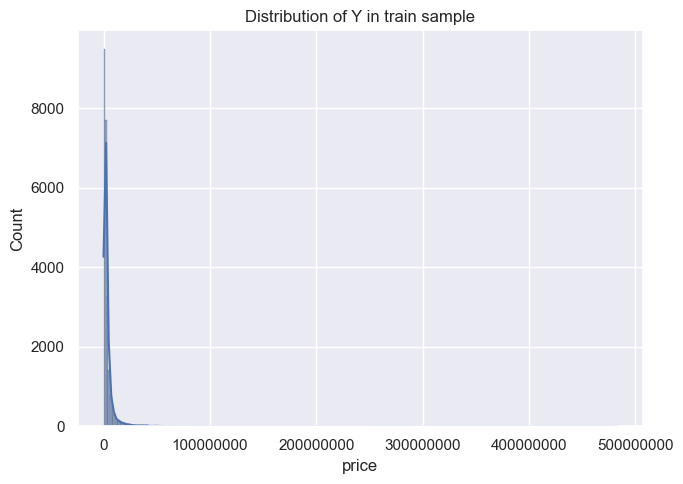

In [70]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(7, 5))
sns.histplot(df_train['price'], kde = True, edgecolor = 'black')
plt.title('Distribution of Y in train sample')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))
plt.grid(True)
plt.tight_layout()
plt.show()

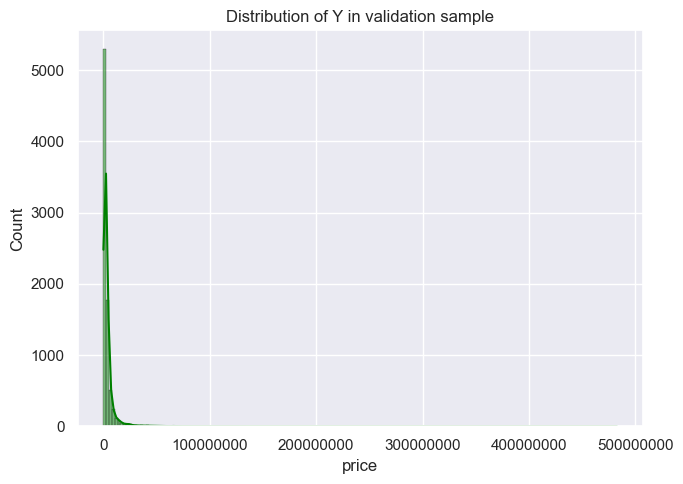

In [73]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(7, 5))
sns.histplot(df_valid['price'], kde = True, edgecolor = 'black', color = 'green')
plt.title('Distribution of Y in validation sample')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))
plt.grid(True)
plt.tight_layout()
plt.show()

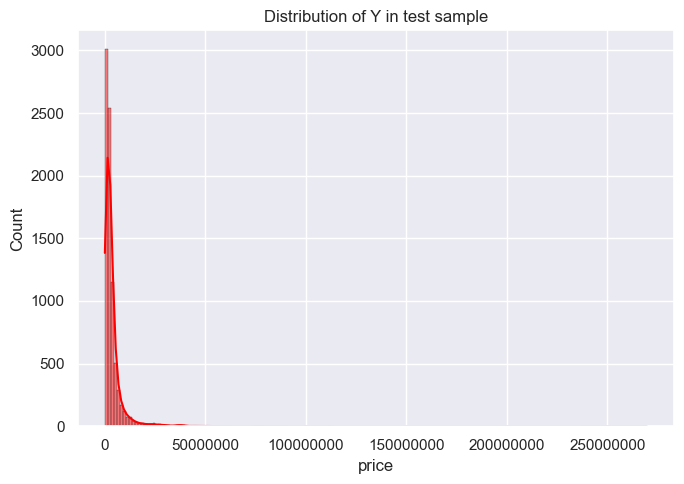

In [74]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(7, 5))
sns.histplot(df_test['price'], kde = True, edgecolor = 'black', color = 'red')
plt.title('Distribution of Y in test sample')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}'))
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 700x500 with 0 Axes>

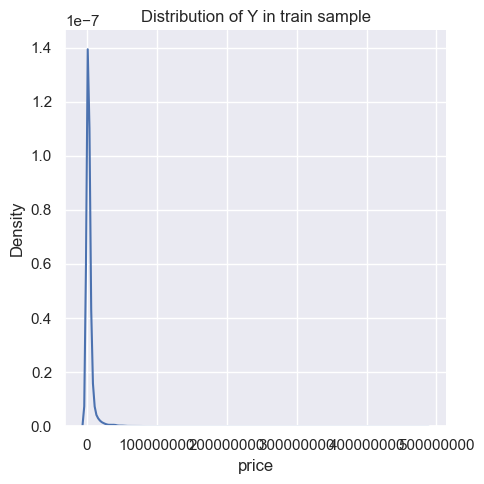

In [78]:
plt.figure(figsize=(7, 5))
sns.displot(df_train, x='price', kind="kde", bw_adjust=2)
plt.title('Distribution of Y in train sample')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}')) 
plt.tight_layout()
plt.show()

<Figure size 700x500 with 0 Axes>

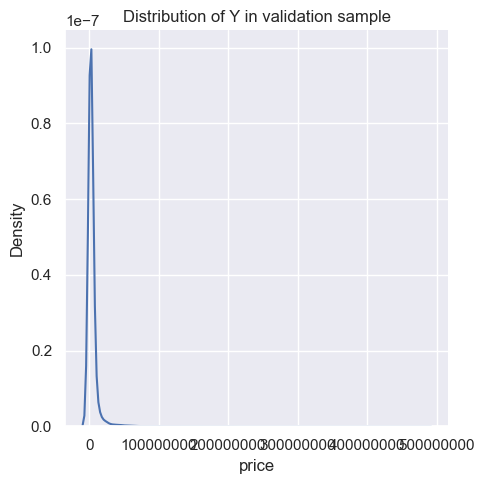

In [79]:
plt.figure(figsize=(7, 5))
sns.displot(df_valid, x='price', kind="kde", bw_adjust=2)
plt.title('Distribution of Y in validation sample')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}')) 
plt.tight_layout()
plt.show()

<Figure size 700x500 with 0 Axes>

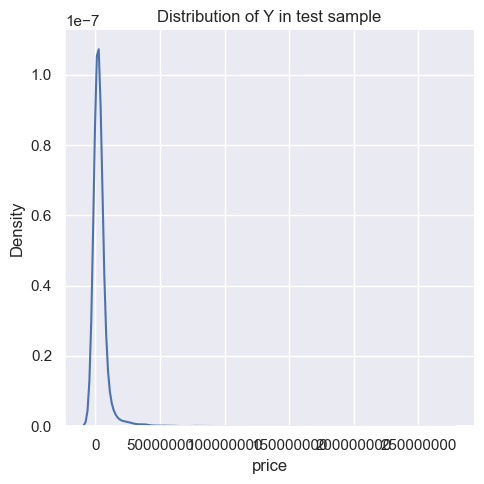

In [80]:
plt.figure(figsize=(7, 5))
sns.displot(df_test, x='price', kind="kde", bw_adjust=2)
plt.title('Distribution of Y in test sample')
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:.0f}')) 
plt.tight_layout()
plt.show()

In [84]:
df_categorical_variables.tolist()

['price_category',
 'type',
 'address',
 'furnishing',
 'completion_status',
 'post_date',
 'building_name',
 'area_name',
 'city',
 'country',
 'purpose']

In [91]:
df_train['price_category'].value_counts()

price_category
Medium     8378
Average    8274
High       8176
Name: count, dtype: int64

In [92]:
df_train['type'].value_counts()

type
Apartment               17412
Villa                    4435
Townhouse                2023
Residential Plot          570
Penthouse                 193
Hotel Apartment           119
Residential Building       52
Villa Compound             20
Residential Floor           4
Name: count, dtype: int64

In [93]:
df_train['address'].value_counts()

address
Al Yasmeen, Ajman                                                                 204
Al Zahya, Ajman                                                                   171
Hayyan, Barashi, Sharjah                                                          160
Al Mamsha, Muwaileh, Sharjah                                                      141
Faradis Tower, Al Mamzar, Sharjah                                                 139
                                                                                 ... 
399 Hills Park B, 399 Hills Park, Dubai Hills Estate, Dubai                         1
Maeen 5, Maeen, The Lakes, Dubai                                                    1
Vincitore Boulevard B, Vincitore Boulevard, Arjan, Dubai                            1
Mediterranean Cluster, Jumeirah Islands, Dubai                                      1
Shakespeare Circus 1, Shakespeare Circus, Uptown Motor City, Motor City, Dubai      1
Name: count, Length: 3493, dtype: int64

In [94]:
df_train['furnishing'].value_counts()

furnishing
Unfurnished    19200
Furnished       5628
Name: count, dtype: int64

In [95]:
df_train['completion_status'].value_counts()

completion_status
Ready       14871
Off-Plan     9957
Name: count, dtype: int64

In [98]:
# df_train['post_date'].value_counts()

In [100]:
# df_train['building_name'].value_counts()

In [102]:
# df_train['area_name'].value_counts()

In [103]:
df_train['city'].value_counts()

city
Dubai             17261
Abu Dhabi          3678
Sharjah            2493
Ajman              1140
Ras Al Khaimah      245
Umm Al Quwain         7
Al Ain                3
Fujairah              1
Name: count, dtype: int64

In [104]:
df_train['purpose'].value_counts()

purpose
For Sale    24828
Name: count, dtype: int64

### Saving...

In [106]:
#save df to CSV file
df_train.to_csv('../Data/df_train.csv', index=False)
df_valid.to_csv('../Data/df_valid.csv', index=False)
df_test.to_csv('../Data/df_test.csv', index=False)

In [117]:
#save df to pickle file
df.to_pickle('../artifacts/df.pkl')

df_train.to_pickle('../artifacts/df_train.pkl')

df_valid.to_pickle('../artifacts/df_valid.pkl')

df_test.to_pickle('../artifacts/df_test.pkl')

# df = pd.read_pickle('file_name.pkl')

In [118]:
joblib.dump(columns_with_missings, '../artifacts/columns_with_missings.pkl')
joblib.dump(df_numerical_variables, '../artifacts/df_numerical_variables.pkl')
joblib.dump(df_categorical_variables, '../artifacts/df_categorical_variables.pkl')

['../artifacts/df_categorical_variables.pkl']

In [116]:
# column_with_missings = joblib.load('../artifacts/column_with_missings.pkl')

In [122]:
df_train.columns.tolist()

['price',
 'price_category',
 'type',
 'beds',
 'baths',
 'address',
 'furnishing',
 'completion_status',
 'post_date',
 'average_rent',
 'building_name',
 'year_of_completion',
 'total_parking_spaces',
 'total_floors',
 'total_building_area_sqft',
 'elevators',
 'area_name',
 'city',
 'country',
 'Latitude',
 'Longitude',
 'purpose']

<Axes: ylabel='price'>

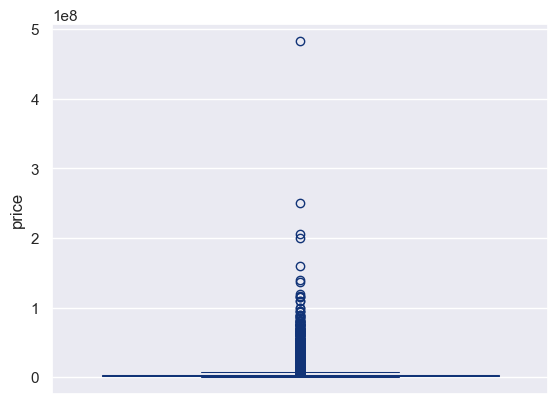

In [123]:
sns.boxplot(df_train['price'], color=".8", linecolor="#137", linewidth=.75)

<Axes: ylabel='beds'>

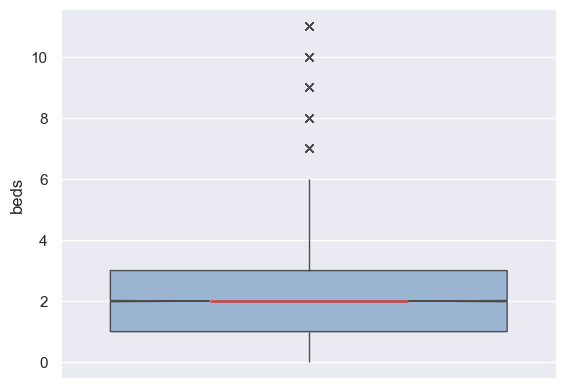

In [124]:
sns.boxplot(
    df_train['beds'],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

<Axes: ylabel='baths'>

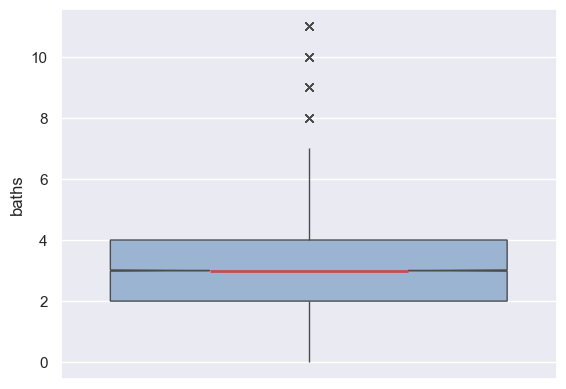

In [126]:
sns.boxplot(
    df_train['baths'],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

<Axes: ylabel='average_rent'>

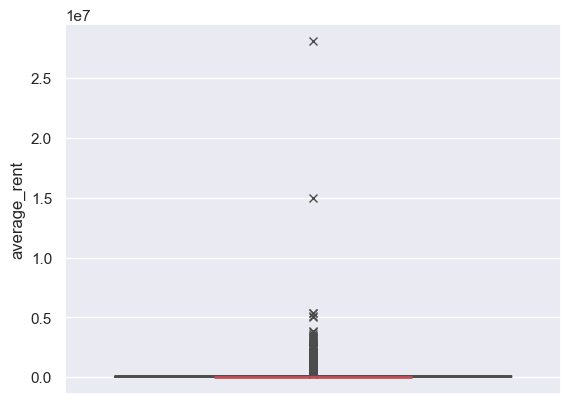

In [127]:
sns.boxplot(
    df_train['average_rent'],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

<Axes: ylabel='total_floors'>

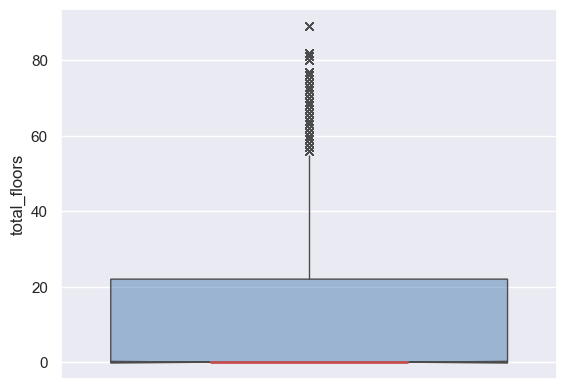

In [129]:
sns.boxplot(
    df_train['total_floors'],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

<Axes: ylabel='elevators'>

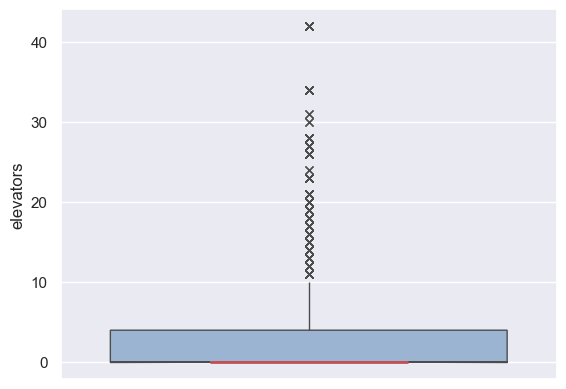

In [130]:
sns.boxplot(
    df_train['elevators'],
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

<Axes: ylabel='elevators'>

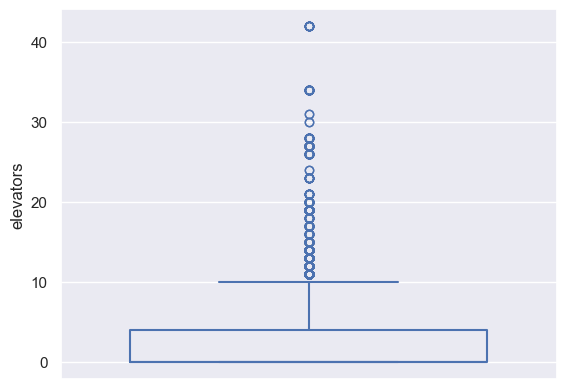

In [132]:
sns.boxplot(df_train['elevators'], fill=False, gap=.1)

<Axes: ylabel='elevators'>

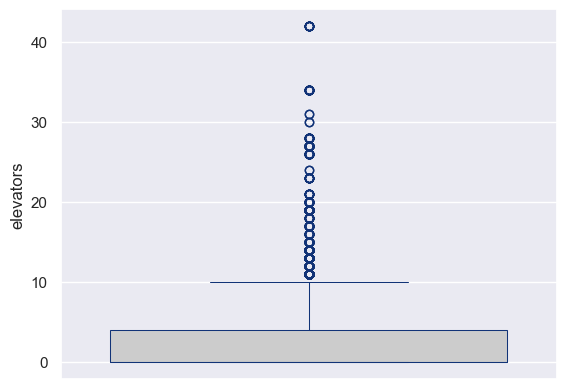

In [133]:
sns.boxplot(df_train['elevators'], color=".8", linecolor="#137", linewidth=.75)

<Axes: ylabel='elevators'>

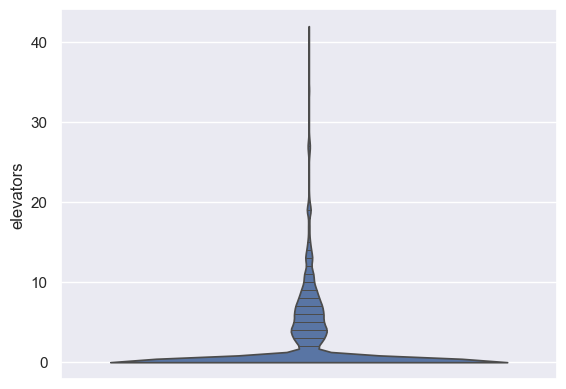

In [138]:
sns.violinplot(df_train['elevators'], cut=0, inner="stick")

<Axes: ylabel='elevators'>

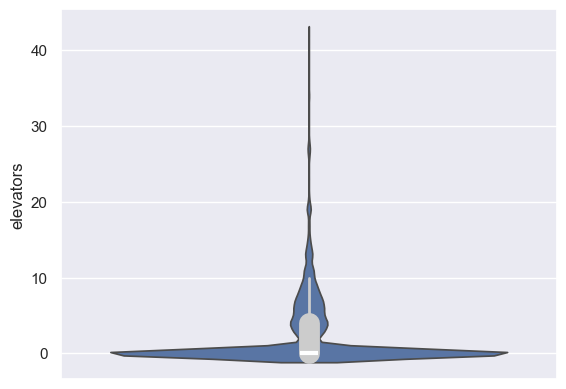

In [139]:
sns.violinplot(df_train['elevators'], inner_kws=dict(box_width=15, whis_width=2, color=".8"))

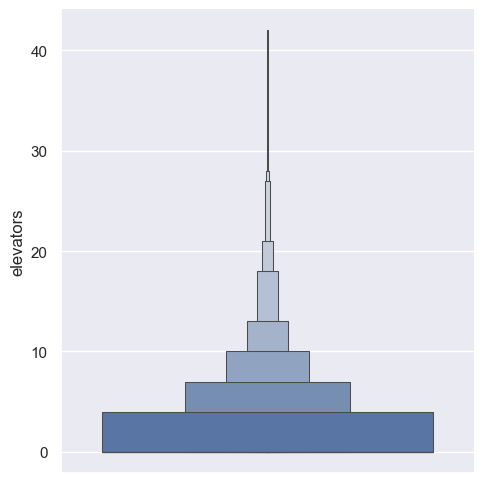

In [141]:
sns.catplot(df['elevators'], kind="boxen")

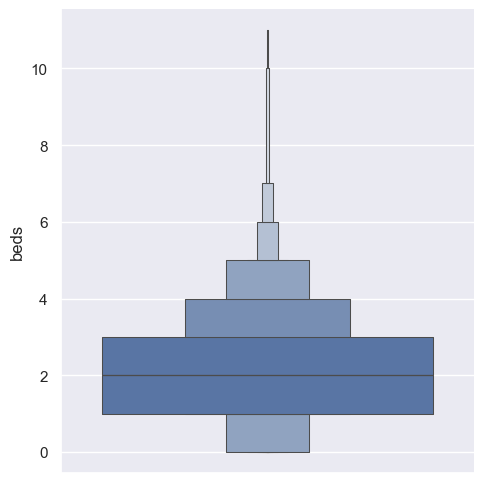

In [142]:
sns.catplot(df['beds'], kind="boxen")

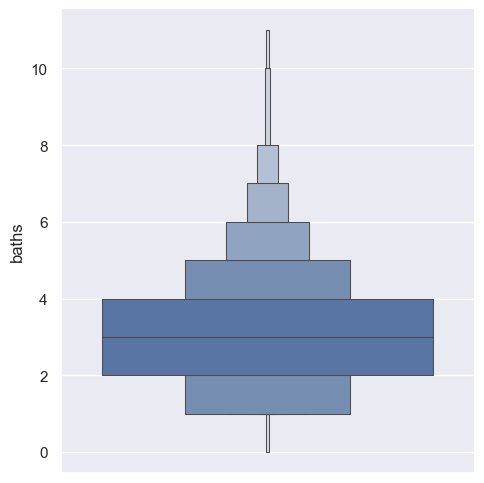

In [143]:
sns.catplot(df['baths'], kind="boxen")

<Axes: ylabel='baths'>

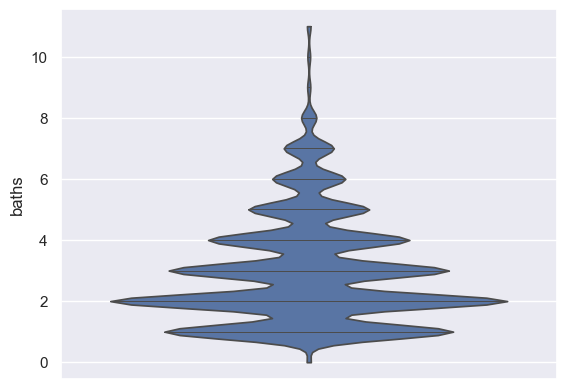

In [144]:
sns.violinplot(df_train['baths'], cut=0, inner="stick")

<Axes: ylabel='baths'>

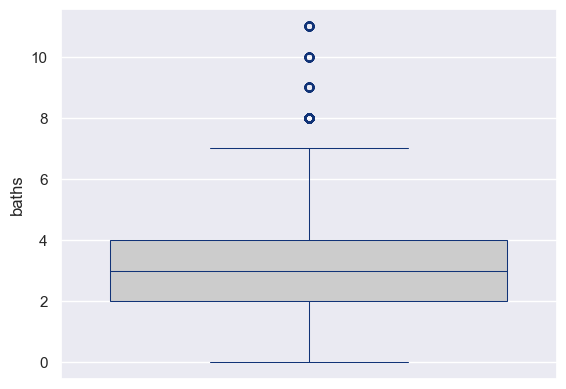

In [145]:
sns.boxplot(df_train['baths'], color=".8", linecolor="#137", linewidth=.75)

<Axes: ylabel='baths'>

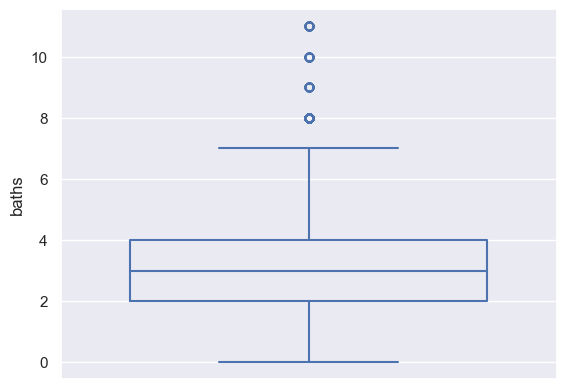

In [146]:
sns.boxplot(df_train['baths'], fill=False, gap=.1)

In [155]:
numeric_columns = [ 'price', 'beds', 'baths', 'average_rent', 'year_of_completion', 'total_parking_spaces', 'total_floors', 'total_building_area_sqft', 'elevators' ]

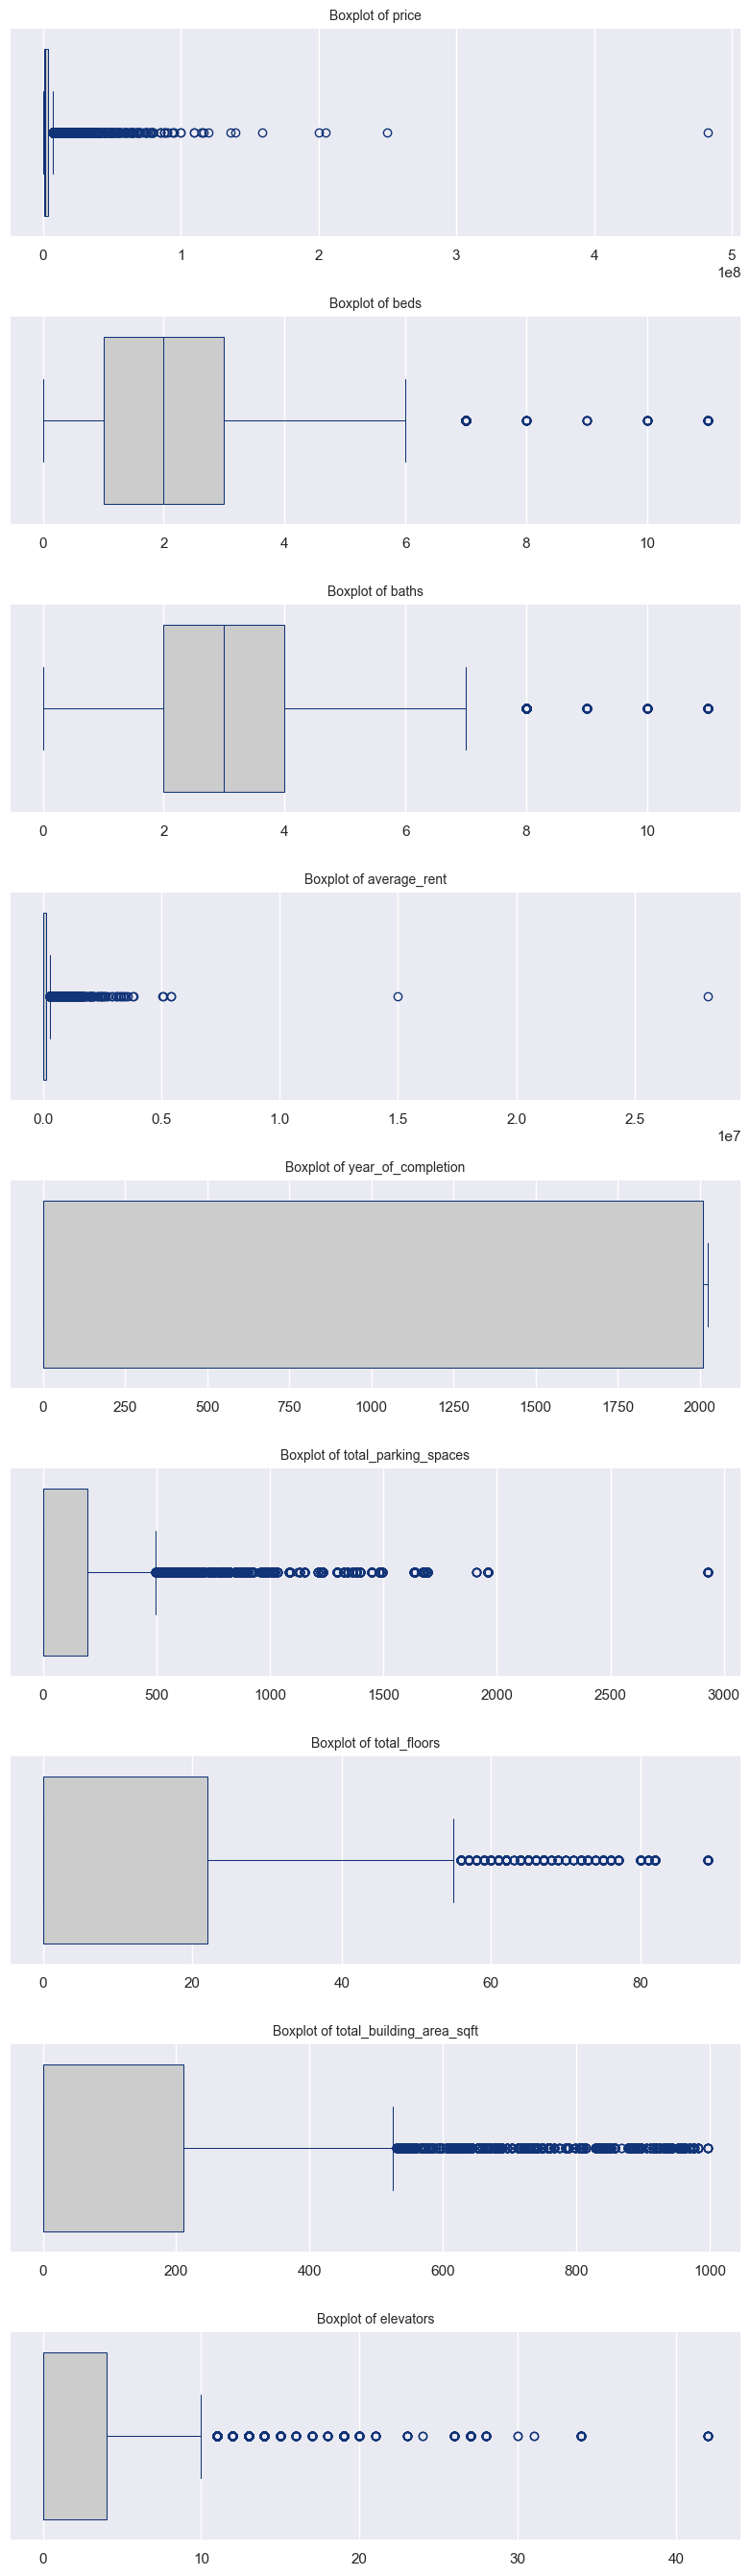

In [158]:
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(8, 3*len(numeric_columns)))

for i, col in enumerate(numeric_columns): 
    sns.boxplot(x=df_train[col], color=".8", linecolor="#137", linewidth=.75, ax=axes[i]) 
    axes[i].set_title(f'Boxplot of {col}', fontsize=10) 
    axes[i].set_xlabel("") # remove x-axis label for cleaner look 
    
plt.tight_layout() 
plt.show()

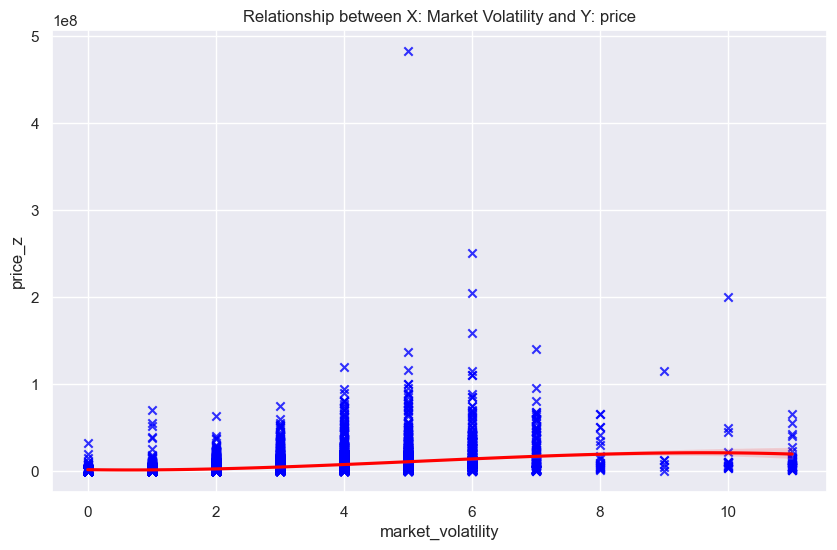

In [173]:
sns.set_theme()

plt.figure(figsize=(10, 6))
sns.regplot(
    x = 'beds',
    y = 'price',
    data = df_train, # to select sub sample
    scatter_kws = {'color' : 'blue'},
    line_kws = {'color': 'red'},
    order = 3, # higher order polynomial regression to capture nonlinear trends
    ci = 95, # confidence interval: 95%
    marker = 'x'
)

plt.title('Relationship between X: Market Volatility and Y: price')
plt.xlabel('market_volatility')
plt.ylabel('price_z')
plt.show()